# Example scripts to generate aperture and phase maskswith pyMOE 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

from matplotlib import pyplot as plt 
import numpy as np 
import sys
sys.path.insert(0,'..')
import pyMOE as moe
from scipy.constants import micro, nano, milli

## First example: Circular aperture 

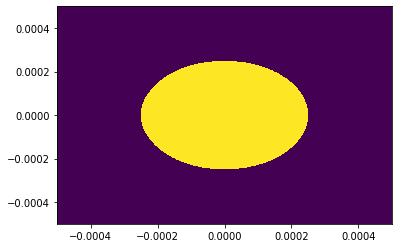

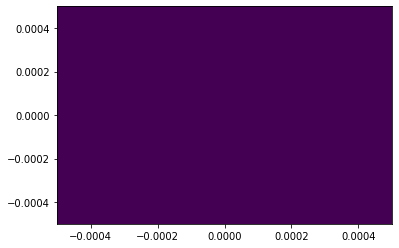

In [6]:
# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)

# Create circular aperture on mask
center=(0*micro, 0*micro)
mask = moe.generate.circular_aperture(mask, radius=250*micro, )


# Accessing data inside mask class
amplitude = mask.amplitude
phase = mask.phase

phase_unwrap = mask.unwrap
x = mask.x
y = mask.y

XX = mask.XX
YY = mask.YY

complex_aperture = mask.aperture

plt.figure()
plt.pcolormesh(x,y,amplitude)
plt.figure()
plt.pcolormesh(x,y,phase_unwrap)



# Plotting using internal functions

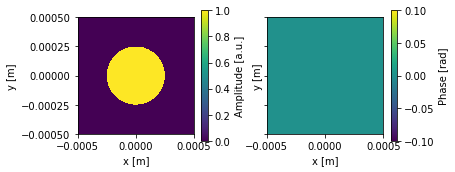

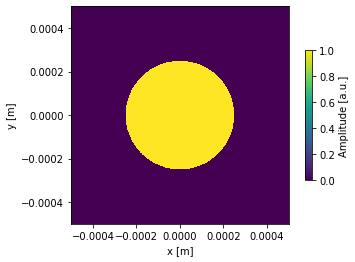

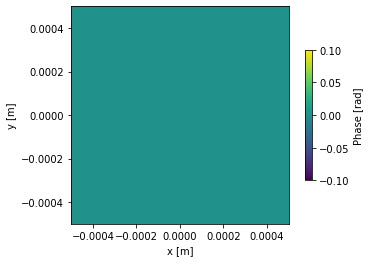

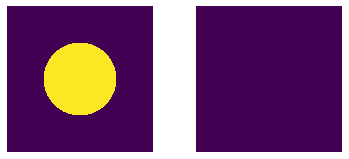

In [11]:

# Plot amplitude and phase
moe.plotting.plot_aperture(mask)

# Plot amplitude
moe.plotting.plot_aperture(mask, which='amplitude')

# Plot phase
moe.plotting.plot_aperture(mask, which='phase')

# Plot only plot
moe.plotting.plot_aperture(mask, only_plot=True)

# Rectangular Aperture

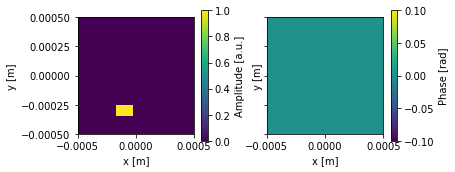

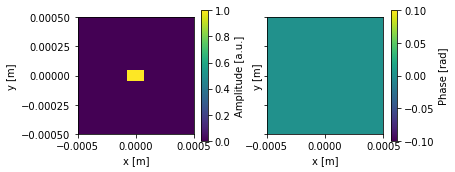

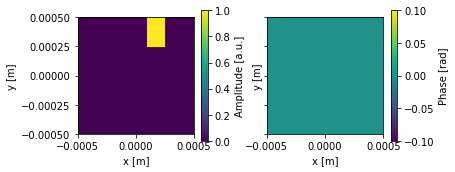

In [7]:

# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)

# create rectangular mask
rectangle = moe.generate.rectangular_aperture(mask, 150*micro, 100*micro, center=(-100*micro, -300*micro))
moe.plotting.plot_aperture(rectangle, )


rectangle = moe.generate.rectangular_aperture(mask, 150*micro, 100*micro, )
moe.plotting.plot_aperture(rectangle, )

rectangle = moe.generate.rectangular_aperture(mask, 150*micro, 500*micro, corner=(100*micro, 250*micro))
moe.plotting.plot_aperture(rectangle, )

## Fresnel Zone Plate

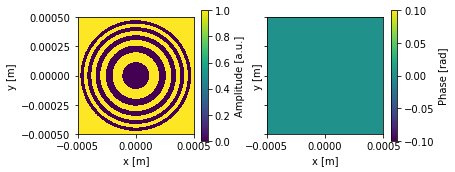

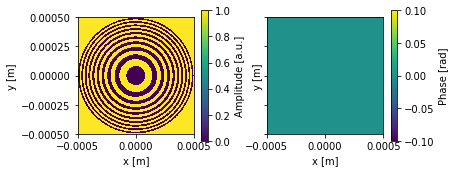

In [10]:

# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=50mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_zone_plate_aperture(mask, 50*milli, 532*nano, radius=500*micro)
moe.plotting.plot_aperture(mask, )


# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=25mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_zone_plate_aperture(mask, 25*milli, 532*nano, radius=500*micro)
moe.plotting.plot_aperture(mask, )



# Fresnel phase mask

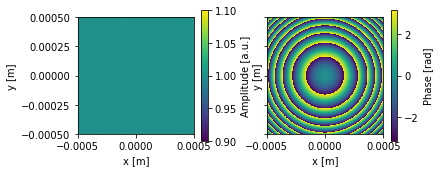

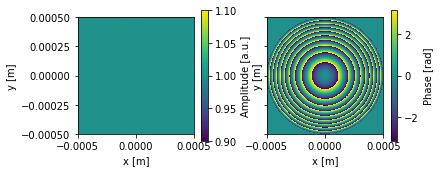

In [12]:
# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=50mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_phase(mask, 50*milli, 532*nano, )
moe.plotting.plot_aperture(mask, )

# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=25mm, lambda=532nm, R=500µm

# and truncate around radius
mask = moe.generate.fresnel_phase(mask, 25*milli, 532*nano, radius=500*micro)
moe.plotting.plot_aperture(mask, )

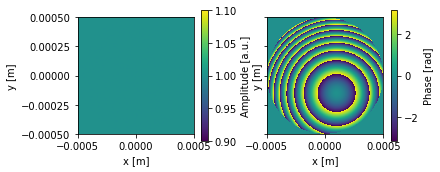

In [13]:
# offcenter fresnel phase mask
aperture = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
center=(100*micro, -150*micro)
aperture =  moe.generate.arbitrary_function_phase(aperture, moe.sag.fresnel_lens_phase, center=center, focal_length=50*milli, wavelength=532*nano)


# Truncate around (0,0)
aperture = moe.generate.truncate_radius_phase(aperture, 500*micro, center=(0,0))



moe.plotting.plot_aperture(aperture)

## Spiral phase

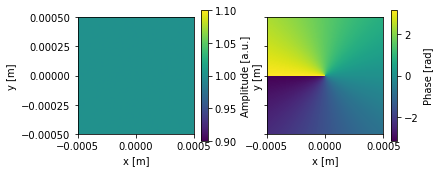

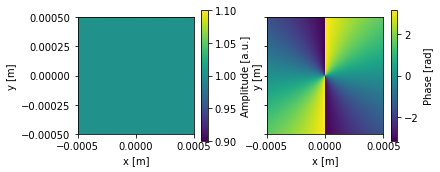

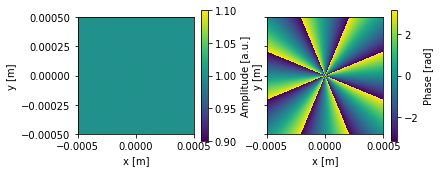

In [18]:



aperture = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
center=(0,0)
aperture =  moe.generate.arbitrary_function_phase(aperture, moe.sag.spiral, center=center, L=1)
moe.plotting.plot_aperture(aperture)

aperture =  moe.generate.arbitrary_function_phase(aperture, moe.sag.spiral, center=center, L=2)
moe.plotting.plot_aperture(aperture)

aperture =  moe.generate.arbitrary_function_phase(aperture, moe.sag.spiral, center=center, L=8)
moe.plotting.plot_aperture(aperture)

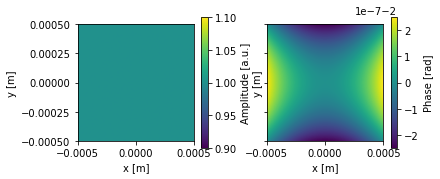

In [3]:
# Saddle function

aperture = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
center=(0,0)
aperture =  moe.generate.arbitrary_function_phase(aperture, moe.sag.saddle, center=center, a=1,b=2)
moe.plotting.plot_aperture(aperture)
